In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
df = pd.read_csv('alltests_with_normalized_results.csv')

In [4]:
df.benchmark.unique()

array(['stressng-cpu-ackermann', 'stressng-cpu-bitops',
       'stressng-cpu-callfunc', 'stressng-cpu-cdouble',
       'stressng-cpu-cfloat', 'stressng-cpu-clongdouble',
       'stressng-cpu-correlate', 'stressng-cpu-crc16',
       'stressng-cpu-decimal32', 'stressng-cpu-decimal64',
       'stressng-cpu-decimal128', 'stressng-cpu-dither',
       'stressng-cpu-djb2a', 'stressng-cpu-double', 'stressng-cpu-euler',
       'stressng-cpu-explog', 'stressng-cpu-fft', 'stressng-cpu-fibonacci',
       'stressng-cpu-float', 'stressng-cpu-fnv1a', 'stressng-cpu-gamma',
       'stressng-cpu-gcd', 'stressng-cpu-gray', 'stressng-cpu-hamming',
       'stressng-cpu-hanoi', 'stressng-cpu-hyperbolic',
       'stressng-cpu-idct', 'stressng-cpu-int128', 'stressng-cpu-int64',
       'stressng-cpu-int32', 'stressng-cpu-int16', 'stressng-cpu-int8',
       'stressng-cpu-int128float', 'stressng-cpu-int128double',
       'stressng-cpu-int128longdouble', 'stressng-cpu-int128decimal32',
       'stressng-cpu-int128

In [5]:
len(df.benchmark.unique())

114

In [6]:
df['machine'].unique()

array(['192.168.140.82', '192.168.140.86', 'clnode056.clemson.cloudlab.us',
       'dwill.soe.ucsc.edu', 'nibbler.soe.ucsc.edu'], dtype=object)

In [7]:
norm_grouped = df.copy().groupby(['benchmark','machine', 'limits', 'class'])['normalized'].mean().to_frame()

In [8]:
norm_grouped.reset_index(inplace=True)


In [9]:
norm_grouped.copy().groupby(['machine', 'limits', 'class'])['normalized'].mean().to_frame()

normalized
machine                       limits     class             
192.168.140.82                quota-7111 cpu       1.251873
                                         matrix    1.119977
                                         memory    0.827939
                                         string    1.061197
                              without    cpu       2.301533
                                         matrix    2.083920
                                         memory    1.415023
                                         string    2.036511
192.168.140.86                quota-6352 cpu       1.020208
                                         matrix    1.349450
                                         memory    1.084323
                                         string    1.059107
                              without    cpu       2.843353
                                         matrix    3.800009
                                         memory    2.857991
                                         string    3.060843
clnode056.clemson.cloudlab.us quota-7009 cpu       0.998948
                                         matrix    1.360818
                                         memory    1.193151
                                         string    1.092312
                              without    cpu       1.992501
                                         matrix    2.697896
                                         memory    2.089468
                                         string    2.189341
dwill.soe.ucsc.edu            quota-5465 cpu       1.663075
                                         matrix    2.078700
                                         memory    6.324381
                                         string    1.652333
                              without    cpu       3.146176
                                         matrix    3.903264
                                         memory   10.493050
                                         string    3.137976
nibbler.soe.ucsc.edu          quota-7116 cpu       1.261085
                                         matrix    1.327657
                                         memory    1.426614
                                         string    1.191620
                              without    cpu       2.547126
                                         matrix    2.798430
                                         memory    2.503195
                                         string    2.460456

In [10]:
norm_grouped.copy().groupby(['machine', 'limits', 'class'])['normalized'].median().to_frame()

normalized
machine                       limits     class             
192.168.140.82                quota-7111 cpu       0.948978
                                         matrix    1.025303
                                         memory    0.848072
                                         string    1.103925
                              without    cpu       1.789676
                                         matrix    1.898529
                                         memory    1.433288
                                         string    2.096729
192.168.140.86                quota-6352 cpu       0.886945
                                         matrix    1.423799
                                         memory    1.040982
                                         string    1.037474
                              without    cpu       2.485209
                                         matrix    4.088417
                                         memory    2.781503
                                         string    3.124559
clnode056.clemson.cloudlab.us quota-7009 cpu       0.891621
                                         matrix    1.438016
                                         memory    1.071426
                                         string    1.108242
                              without    cpu       1.773238
                                         matrix    2.886684
                                         memory    1.994703
                                         string    2.228226
dwill.soe.ucsc.edu            quota-5465 cpu       1.350951
                                         matrix    2.283736
                                         memory    1.704305
                                         string    1.738704
                              without    cpu       2.532902
                                         matrix    4.320828
                                         memory    3.047465
                                         string    3.299829
nibbler.soe.ucsc.edu          quota-7116 cpu       1.039444
                                         matrix    1.378364
                                         memory    1.248913
                                         string    1.189231
                              without    cpu       2.180680
                                         matrix    2.942636
                                         memory    2.317950
                                         string    2.407418

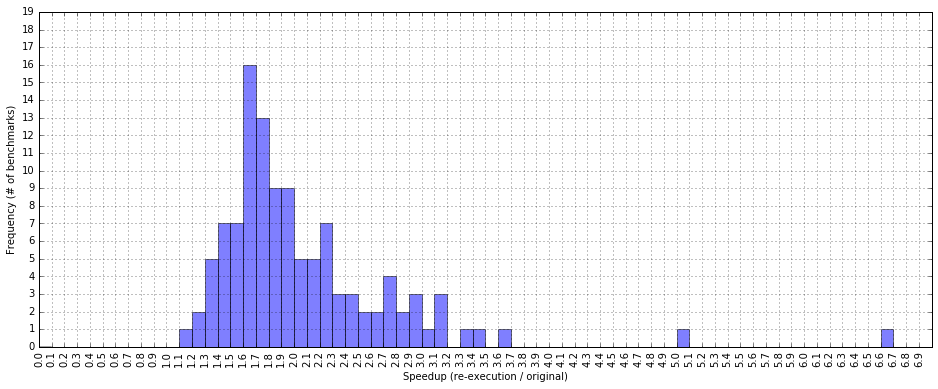

In [21]:
# show the variability profile of a CloudLab node vs. the base machine (piha)
bins=[.5, .55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2,3.25,3.5,3.75,4,4.25,4.5,4.75,5,6,7]
pred=((norm_grouped['machine'] == 'clnode056.clemson.cloudlab.us') & (norm_grouped['limits'] == 'without'))

ax = norm_grouped[pred].groupby('limits').normalized.hist(bins=np.arange(0,7,.1),xrot=90,figsize=(16,6),alpha=0.5)
ticks = ax[0].set_xticks(np.arange(0,7,.1))
ticks = ax[0].set_yticks(range(0,20))
plt.xlabel('Speedup (re-execution / original)')
plt.ylabel('Frequency (# of benchmarks)')
plt.savefig('variability_profile.png', bbox_inches='tight', dpi=300)

The above shows the distribution of speedups for multiple benchmarks (one data point per microbenchmark) of the Cloudlab machine with respect to the 10 year old Xeon machine (piha) . There is 1 microbenchmark that is 6.6-6.7x faster, let's see which one is it.

In [22]:
norm_grouped[(norm_grouped['machine'] == 'clnode056.clemson.cloudlab.us') & (norm_grouped['normalized'] > 6.5)]

,benchmark,machine,limits,class,normalized
745,stressng-cpu-stream,clnode056.clemson.cloudlab.us,without,cpu,6.600784


So the benchmark that is 6.6x faster is stress-ng's version of STREAM. Now let's see the effect of constraining the CPU quota on the CloudLab machine, to see if we can recreate the performance of the base machine.